In [1]:
"""
louvain
"""

'\nlouvain\n'

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import networkx as nx
from community import best_partition
import pandas as pd

### 1.简单的图

In [3]:
G = nx.Graph()

G.add_edges_from([
    (1,2),
    (1,3),
    (1,4),
    (5,6),
    (5,7),
    (5,8),
    (5,9),
    (15,16),
    (15,17),
    (15,18),
    (15,19),
    (150,160),
    (150,170),
    (150,180),
    (150,190),
])

### 2.随机构图

In [4]:
G = nx.erdos_renyi_graph(n=20, p=0.2)

### 3.社区划分

In [5]:
partition = best_partition(G)

partition

{0: 0,
 1: 0,
 2: 1,
 3: 2,
 4: 2,
 5: 3,
 6: 1,
 7: 0,
 8: 3,
 9: 0,
 10: 2,
 11: 3,
 12: 3,
 13: 1,
 14: 0,
 15: 3,
 16: 0,
 17: 3,
 18: 3,
 19: 3}

In [6]:
len(set(partition.values())) # 社区数量

4

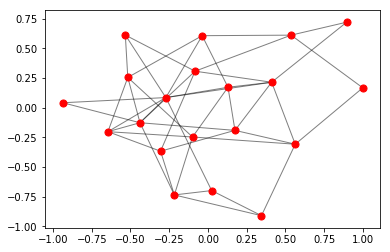

In [7]:
# 画图
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [61]:
%%time
n = 1000
p = 0.5
G = nx.erdos_renyi_graph(n=n, p=p)
partition = best_partition(G)

CPU times: user 28.3 s, sys: 160 ms, total: 28.5 s
Wall time: 28.5 s


In [ ]:
"""
pandas to Graph
"""

In [13]:
edges = pd.DataFrame({'source': [0, 1, 2],
                       'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})
# G = nx.from_pandas_edgelist(edges, edge_attr=["weight", "color"])
G = nx.from_pandas_edgelist(edges, edge_attr=True) # edge_attr=True: 把source target之外的字段都作为边的属性

In [14]:
G.adj

AdjacencyView({0: {2: {'weight': 3, 'color': 'red'}}, 2: {0: {'weight': 3, 'color': 'red'}, 1: {'weight': 4, 'color': 'blue'}, 3: {'weight': 5, 'color': 'blue'}}, 1: {2: {'weight': 4, 'color': 'blue'}}, 3: {2: {'weight': 5, 'color': 'blue'}}})